In [1]:
# !pip install pandas numpy plotly matplotlib scikit-learn seaborn --quiet

In [2]:
import plotly.express as px
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

import random
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(42)
   np.random.seed(42)
   random.seed(42)
reset_random_seeds()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<strong>Loading the data</strong>

Source of data: https://github.com/BDBC-KG-NLP/COVID-19-tracker

In [3]:
raw_df = pd.read_csv("covid_early_stage_symptoms/covid_early_stage_symptoms.csv")

In [4]:
raw_df

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6507,female,44,1,1,0,0,0,0,0,1,0,1
6508,female,44,1,1,0,0,0,0,0,0,0,0
6509,female,58,0,0,0,0,0,0,0,0,0,0
6510,female,58,1,1,0,0,0,0,0,0,0,0


In [5]:
raw_df["gender"].replace({"male":1, "female":0}, inplace=True)

In [6]:
raw_df = raw_df.rename(columns={"SARS-CoV-2 Positive":"Result"})
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   gender               6512 non-null   int64
 1   age_year             6512 non-null   int64
 2   fever                6512 non-null   int64
 3   cough                6512 non-null   int64
 4   runny_nose           6512 non-null   int64
 5   muscle_soreness      6512 non-null   int64
 6   pneumonia            6512 non-null   int64
 7   diarrhea             6512 non-null   int64
 8   lung_infection       6512 non-null   int64
 9   travel_history       6512 non-null   int64
 10  isolation_treatment  6512 non-null   int64
 11  Result               6512 non-null   int64
dtypes: int64(12)
memory usage: 610.6 KB


In [7]:
raw_df

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,Result
0,1,89,1,1,0,0,0,0,0,1,0,0
1,1,68,1,0,0,0,0,0,0,0,0,0
2,1,68,0,0,0,0,0,0,0,1,0,0
3,1,68,1,1,0,0,0,0,0,1,1,1
4,1,50,1,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0,44,1,1,0,0,0,0,0,1,0,1
6508,0,44,1,1,0,0,0,0,0,0,0,0
6509,0,58,0,0,0,0,0,0,0,0,0,0
6510,0,58,1,1,0,0,0,0,0,0,0,0


<strong>Data Analysis</strong>

<AxesSubplot:title={'center':'No. of Data for COVID and Non-COVID'}, xlabel='Result', ylabel='count'>

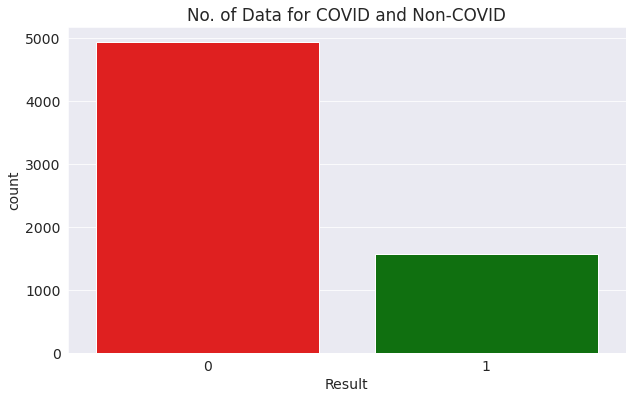

In [8]:
plt.title("No. of Data for COVID and Non-COVID")
sns.countplot(x=raw_df.Result, palette=['r','g'])

Text(0.5, 1.0, 'Correlation Matrix')

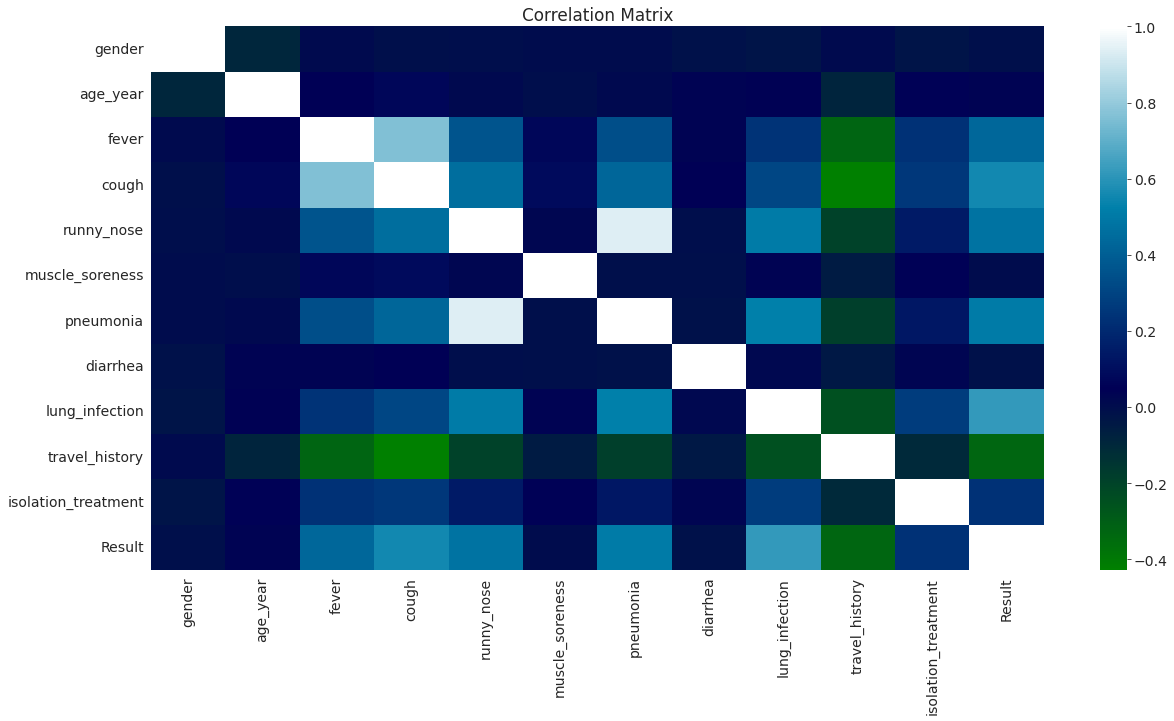

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(raw_df.corr(), ax=ax, cmap="ocean")
plt.title("Correlation Matrix")

<strong>Data Preparation</strong>

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.1525, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.18, random_state=42)

In [12]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (4524, 12)
val_df.shape : (994, 12)
test_df.shape : (994, 12)


In [13]:
input_cols = list(train_df.columns)[0:-1]
target_col = "Result"

In [14]:
print("input_cols =", input_cols)
print("------------------------------")
print("target_col =", target_col)

input_cols = ['gender', 'age_year', 'fever', 'cough', 'runny_nose', 'muscle_soreness', 'pneumonia', 'diarrhea', 'lung_infection', 'travel_history', 'isolation_treatment']
------------------------------
target_col = Result


In [15]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [16]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols, len(numeric_cols)

(['gender',
  'age_year',
  'fever',
  'cough',
  'runny_nose',
  'muscle_soreness',
  'pneumonia',
  'diarrhea',
  'lung_infection',
  'travel_history',
  'isolation_treatment'],
 11)

In [17]:
raw_df[numeric_cols].describe()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment
count,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000
mean,0.517045,44.019502,0.410780,0.303286,0.084306,0.003993,0.074785,0.005682,0.131296,0.650952,0.216984
std,0.499748,16.112865,0.492013,0.459713,0.277867,0.063066,0.263064,0.075169,0.337750,0.476706,0.412223
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [20]:
# Aliasing for convenience
train_inputs = train_inputs[numeric_cols]
val_inputs = val_inputs[numeric_cols]
test_inputs = test_inputs[numeric_cols]

In [21]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4524 entries, 2829 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               4524 non-null   float64
 1   age_year             4524 non-null   float64
 2   fever                4524 non-null   float64
 3   cough                4524 non-null   float64
 4   runny_nose           4524 non-null   float64
 5   muscle_soreness      4524 non-null   float64
 6   pneumonia            4524 non-null   float64
 7   diarrhea             4524 non-null   float64
 8   lung_infection       4524 non-null   float64
 9   travel_history       4524 non-null   float64
 10  isolation_treatment  4524 non-null   float64
dtypes: float64(11)
memory usage: 424.1 KB


In [22]:
train_targets.shape

(4524,)

In [23]:
val_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 5558 to 4748
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               994 non-null    float64
 1   age_year             994 non-null    float64
 2   fever                994 non-null    float64
 3   cough                994 non-null    float64
 4   runny_nose           994 non-null    float64
 5   muscle_soreness      994 non-null    float64
 6   pneumonia            994 non-null    float64
 7   diarrhea             994 non-null    float64
 8   lung_infection       994 non-null    float64
 9   travel_history       994 non-null    float64
 10  isolation_treatment  994 non-null    float64
dtypes: float64(11)
memory usage: 93.2 KB


In [24]:
val_targets.shape

(994,)

In [25]:
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 1263 to 586
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               994 non-null    float64
 1   age_year             994 non-null    float64
 2   fever                994 non-null    float64
 3   cough                994 non-null    float64
 4   runny_nose           994 non-null    float64
 5   muscle_soreness      994 non-null    float64
 6   pneumonia            994 non-null    float64
 7   diarrhea             994 non-null    float64
 8   lung_infection       994 non-null    float64
 9   travel_history       994 non-null    float64
 10  isolation_treatment  994 non-null    float64
dtypes: float64(11)
memory usage: 93.2 KB


In [26]:
test_targets.shape

(994,)

In [27]:
# !pip install pyarrow --quiet

In [28]:
train_inputs.to_parquet('saved_dataset/train_inputs.parquet')
val_inputs.to_parquet('saved_dataset/val_inputs.parquet')
test_inputs.to_parquet('saved_dataset/test_inputs.parquet')

In [29]:
%%time
pd.DataFrame(train_targets).to_parquet('saved_dataset/train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('saved_dataset/val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('saved_dataset/test_targets.parquet')

CPU times: user 16.6 ms, sys: 4.1 ms, total: 20.7 ms
Wall time: 19.7 ms


In [30]:
%%time

train_inputs = pd.read_parquet('saved_dataset/train_inputs.parquet')
val_inputs = pd.read_parquet('saved_dataset/val_inputs.parquet')
test_inputs = pd.read_parquet('saved_dataset/test_inputs.parquet')

train_targets = pd.read_parquet('saved_dataset/train_targets.parquet')[target_col]
val_targets = pd.read_parquet('saved_dataset/val_targets.parquet')[target_col]
test_targets = pd.read_parquet('saved_dataset/test_targets.parquet')[target_col]

CPU times: user 74.4 ms, sys: 8.33 ms, total: 82.8 ms
Wall time: 71.9 ms


<strong>Training the Models</strong>

<strong>First Model Training and Evaluation: Random Forest Classifier Model</strong>

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
# ?RandomForestClassifier

In [32]:
RandomForest = RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
import time
training_start = time.perf_counter()
RandomForest.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

pickle.dump(RandomForest, open("saved_models/RandomForest.pkl", "wb"))
RandomForest = pickle.load(open('saved_models/RandomForest.pkl', 'rb'))

prediction_start = time.perf_counter()
train_preds = RandomForest.predict(train_inputs)
# test_preds = RandomForest.predict(test_inputs)
val_preds = RandomForest.predict(val_inputs)
prediction_end = time.perf_counter()

print('The val F1 Score is', f1_score(val_preds, val_targets)) # primary performace metrics (f1-score)
print('The val accuracy Score is', accuracy_score(val_preds, val_targets))
print('The val precision Score is', precision_score(val_preds, val_targets))
print('The val recall Score is', recall_score(val_preds, val_targets))

train_time = training_end - training_start
prediction_time = prediction_end - prediction_start
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

The val F1 Score is 0.7079646017699116
The val accuracy Score is 0.8672032193158954
The val precision Score is 0.6722689075630253
The val recall Score is 0.7476635514018691
Time consumed for training: 0.319 seconds
Time consumed for prediction: 0.05945 seconds


In [34]:
# plt.figure(figsize=(30,15))

# importance_df = pd.DataFrame({
#     "feature": train_inputs.columns,
#     "importance": RFC_model.feature_importances_
# }).sort_values("importance", ascending=False)
# plt.title("Feature Importance")
# sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [35]:
# importance_df

<strong>Second Model Training and Evaluation: XGBoost Classifier Model</strong>

In [56]:
!pip install xgboost==0.82

     |████████████████████████████████| 114.0 MB 13 kB/s  eta 0:00:01    |██████████▋                     | 38.0 MB 3.9 MB/s eta 0:00:20
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.1
    Uninstalling xgboost-1.5.1:
      Successfully uninstalled xgboost-1.5.1


In [57]:
from xgboost import XGBClassifier

In [58]:
XGBoost = XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False)

In [59]:
training_start = time.perf_counter()
XGBoost.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

pickle.dump(XGBoost, open("saved_models/XGBoost.pkl", "wb"))
XGBoost = pickle.load(open('saved_models/XGBoost.pkl', 'rb'))

prediction_start = time.perf_counter()
train_preds = XGBoost.predict(train_inputs)
test_preds = XGBoost.predict(test_inputs)
val_preds = XGBoost.predict(val_inputs)
prediction_end = time.perf_counter()

print('The val F1 Score is', f1_score(val_preds, val_targets)) # primary performace metrics (f1-score)
print('The val accuracy Score is', accuracy_score(val_preds, val_targets))
print('The val precision Score is', precision_score(val_preds, val_targets))
print('The val recall Score is', recall_score(val_preds, val_targets))
print('The test F1 Score is', f1_score(train_preds, train_targets))
print('The test accuracy Score is', accuracy_score(train_preds, train_targets))


train_time = training_end - training_start
prediction_time = prediction_end - prediction_start
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

The val F1 Score is 0.7106598984771574
The val accuracy Score is 0.8853118712273642
The val precision Score is 0.5882352941176471
The val recall Score is 0.8974358974358975
The test F1 Score is 0.7307692307692308
The test accuracy Score is 0.8916887709991158
Time consumed for training: 0.368 seconds
Time consumed for prediction: 0.01029 seconds


In [40]:
# plt.figure(figsize=(30,15))

# importance_df = pd.DataFrame({
#     "feature": train_inputs.columns,
#     "importance": XGB_model.feature_importances_
# }).sort_values("importance", ascending=False)
# plt.title("Feature Importance")
# sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [41]:
# importance_df

<strong>Third Model Training and Evaluation: Support Vector Machine Classifier Model</strong>

In [42]:
# !pip install SVC

In [43]:
from sklearn.svm import SVC
SVMC = SVC(random_state=42)

In [44]:
training_start = time.perf_counter()
SVMC.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

pickle.dump(SVMC, open("saved_models/SVMC.pkl", "wb"))
SVMC = pickle.load(open('saved_models/SVMC.pkl', 'rb'))

prediction_start = time.perf_counter()
train_preds = SVMC.predict(train_inputs)
test_preds = SVMC.predict(test_inputs)
val_preds = SVMC.predict(val_inputs)
prediction_end = time.perf_counter()

print('The val F1 Score is', f1_score(val_preds, val_targets)) # primary performace metrics (f1-score)
print('The val accuracy Score is', accuracy_score(val_preds, val_targets))
print('The val precision Score is', precision_score(val_preds, val_targets))
print('The val recall Score is', recall_score(val_preds, val_targets))

train_time = training_end - training_start
prediction_time = prediction_end - prediction_start
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

The val F1 Score is 0.3
The val accuracy Score is 0.8028169014084507
The val precision Score is 0.17647058823529413
The val recall Score is 1.0
Time consumed for training: 0.535 seconds
Time consumed for prediction: 0.79134 seconds


<strong>Fourth Model Training and Evaluation: Gaussian Naive Bayes Classifier Model</strong>

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
NaiveBayes = GaussianNB()
training_start = time.perf_counter()
NaiveBayes.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

pickle.dump(NaiveBayes, open("saved_models/NaiveBayes.pkl", "wb"))
NaiveBayes = pickle.load(open('saved_models/NaiveBayes.pkl', 'rb'))

prediction_start = time.perf_counter()
train_preds = NaiveBayes.predict(train_inputs)
test_preds = NaiveBayes.predict(test_inputs)
val_preds = NaiveBayes.predict(val_inputs)
prediction_end = time.perf_counter()

print('The val F1 Score is', f1_score(val_preds, val_targets)) # primary performace metrics (f1-score)
print('The val accuracy Score is', accuracy_score(val_preds, val_targets))
print('The val precision Score is', precision_score(val_preds, val_targets))
print('The val recall Score is', recall_score(val_preds, val_targets))

train_time = training_end - training_start
prediction_time = prediction_end - prediction_start
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

The val F1 Score is 0.6819338422391857
The val accuracy Score is 0.8742454728370221
The val precision Score is 0.5630252100840336
The val recall Score is 0.864516129032258
Time consumed for training: 0.013 seconds
Time consumed for prediction: 0.01316 seconds


<strong>Fifth Model Training and Evaluation: Support Vector Machine Classifier Model</strong>

In [47]:
from sklearn.neighbors  import KNeighborsClassifier

In [48]:
KNeighbors = KNeighborsClassifier(n_jobs=-1)
training_start = time.perf_counter()
KNeighbors.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

pickle.dump(KNeighbors, open("saved_models/KNeighbors.pkl", "wb"))
KNeighbors = pickle.load(open('saved_models/KNeighbors.pkl', 'rb'))

prediction_start = time.perf_counter()
train_preds = KNeighbors.predict(train_inputs)
test_preds = KNeighbors.predict(test_inputs)
val_preds = KNeighbors.predict(val_inputs)
prediction_end = time.perf_counter()

print('The val F1 Score is', f1_score(val_preds, val_targets)) # primary performace metrics (f1-score)
print('The val accuracy Score is', accuracy_score(val_preds, val_targets))
print('The val precision Score is', precision_score(val_preds, val_targets))
print('The val recall Score is', recall_score(val_preds, val_targets))

train_time = training_end - training_start
prediction_time = prediction_end - prediction_start
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

The val F1 Score is 0.6697892271662763
The val accuracy Score is 0.858148893360161
The val precision Score is 0.6008403361344538
The val recall Score is 0.7566137566137566
Time consumed for training: 0.009 seconds
Time consumed for prediction: 0.19854 seconds


<strong>Sixth Model Training and Evaluation: Logistic Regressor Classifier Model</strong>

In [49]:
from sklearn.linear_model import LogisticRegression

LogRegession = LogisticRegression(n_jobs=-1, random_state=42, max_iter=1000)
training_start = time.perf_counter()
LogRegession.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

pickle.dump(LogRegession, open("saved_models/LogRegession.pkl", "wb"))
LogRegession = pickle.load(open('saved_models/LogRegession.pkl', 'rb'))

prediction_start = time.perf_counter()
train_preds = LogRegession.predict(train_inputs)
test_preds = LogRegession.predict(test_inputs)
val_preds = LogRegession.predict(val_inputs)
prediction_end = time.perf_counter()

print('The val F1 Score is', f1_score(val_preds, val_targets)) # primary performace metrics (f1-score)
print('The val accuracy Score is', accuracy_score(val_preds, val_targets))
print('The val precision Score is', precision_score(val_preds, val_targets))
print('The val recall Score is', recall_score(val_preds, val_targets))

train_time = training_end - training_start
prediction_time = prediction_end - prediction_start
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

The val F1 Score is 0.6994818652849741
The val accuracy Score is 0.8832997987927566
The val precision Score is 0.5672268907563025
The val recall Score is 0.9121621621621622
Time consumed for training: 0.935 seconds
Time consumed for prediction: 0.00479 seconds


<strong>Seventh Model Training and Evaluation: LGBM Classifier Model</strong>

In [50]:
# !pip install lightgbm

In [51]:
import lightgbm as lgbm

LGBM = lgbm.LGBMClassifier(n_jobs=-1, random_state=42)
training_start = time.perf_counter()
LGBM.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

pickle.dump(LGBM, open("saved_models/LGBM.pkl", "wb"))
LGBM = pickle.load(open('saved_models/LGBM.pkl', 'rb'))

prediction_start = time.perf_counter()
train_preds = LGBM.predict(train_inputs)
test_preds = LGBM.predict(test_inputs)
val_preds = LGBM.predict(val_inputs)
prediction_end = time.perf_counter()

print('The val F1 Score is', f1_score(val_preds, val_targets)) # primary performace metrics (f1-score)
print('The val accuracy Score is', accuracy_score(val_preds, val_targets))
print('The val precision Score is', precision_score(val_preds, val_targets))
print('The val recall Score is', recall_score(val_preds, val_targets))

train_time = training_end - training_start
prediction_time = prediction_end - prediction_start
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

The val F1 Score is 0.7281105990783411
The val accuracy Score is 0.8812877263581489
The val precision Score is 0.6638655462184874
The val recall Score is 0.8061224489795918
Time consumed for training: 0.069 seconds
Time consumed for prediction: 0.01874 seconds
